In [2]:
# Tratamiento de datos

import pandas as pd  # Manipulación y análisis de datos.
import numpy as np  # Soporte para vectores y matrices.

# Gráficos

import matplotlib.pyplot as plt  # Creación de gráficos estáticos, animados e interactivos.
from matplotlib import style  # Personalización del estilo de los gráficos.

# Preprocesado y modelado

from scipy.stats import pearsonr  # Coeficiente de correlación de Pearson.
from sklearn.model_selection import train_test_split  # División de datos en conjuntos de entrenamiento y prueba.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Métricas para evaluar modelos.
import statsmodels.api as sm  # Modelos estadísticos y econometricos.
import statsmodels.formula.api as smf  # Modelo estadísticos con fórmulas.
from statsmodels.stats.anova import anova_lm  # Análisis de varianza.
from scipy import stats  # Funciones estadísticas.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler  # Preprocesamiento de datos.
import category_encoders  # Codificación de variables categóricas.
import missingno as msno  # Visualización de datos faltantes.
from sklearn.pipeline import Pipeline  # Cadena de transformaciones con un estimador final.
from sklearn.experimental import enable_iterative_imputer  # Permitir uso de IterativeImputer.
from sklearn.impute import IterativeImputer  # Imputación de datos faltantes.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Modelos de ensamble.
from sklearn.model_selection import GridSearchCV, cross_val_score  # Búsqueda de hiperparámetros y validación cruzada.

# Deep Learning

import tensorflow as tf  # Biblioteca de Deep Learning.
from tensorflow.keras import layers, models  # Construcción de modelos de deep learning.
from keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks para controlar el entrenamiento.
from keras.models import Sequential  # Creación de modelos secuenciales.
from keras.layers import Dense, Dropout, BatchNormalization  # Capas para construir modelos.
from keras import regularizers  # Regularización de modelos.

In [3]:
import pandas as pd

# Cargamos el archivo csv con los datos

df_central = pd.read_csv("https://raw.githubusercontent.com/jesusvillaalvarez/TFM_KSCHOL/main/5.ARCHIVOS/df_central_2_1.csv")

df_central.head()


,Unnamed: 0,Fecha,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_PREV_LOW,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
0,0,2021-01-01,1,0.0,0.0,0.0,0,0,0,4,False,2021,1,1
1,1,2021-01-01,2,0.0,0.0,0.0,0,0,0,4,False,2021,1,1
2,2,2021-01-01,3,0.0,0.0,0.0,0,0,0,4,False,2021,1,1
3,3,2021-01-01,4,0.0,0.0,0.0,0,0,0,4,False,2021,1,1
4,4,2021-01-01,5,0.0,0.0,0.0,0,0,0,4,False,2021,1,1


In [4]:
# Eliminamos las columnas innecesarias

df_central = df_central.drop(columns=['Unnamed: 0', 'DESVIO', 'f_PREV_HIGH', 'f_PREV_LOW'])



In [5]:
# Convertimos la columna 'Fecha' a Datetime para hacer las división en dos dfs

df_central['Fecha'] = pd.to_datetime(df_central['Fecha'])

# Dividimos el DataFrame en dos según las fechas especificas

df_inicio = df_central[df_central['Fecha'] <= '2023-10-31']
df_final = df_central[df_central['Fecha'] >= '2023-11-05']

# Eliminamos la columna 'Fecha' de ambos DataFrames para poder preparar el modelo de Deep Learning

df_inicio = df_inicio.drop(columns=['Fecha'])
df_final = df_final.drop(columns=['Fecha'])



In [6]:

# Preparamos df_inicio eliminando la variables objetivo del conjunto de entrenamiento (X) y especificamos la variable objetivo del conjunto de prueba (y)

X = df_inicio.drop('E_SIMEL', axis=1)
y = df_inicio['E_SIMEL']

# Dividimos los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizamos las características, paso necesario para el modelo de deep learning

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificamos las dimensiones de los conjuntos de datos para asegurarnos de que todo está correcto

(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)


((19764, 8), (4942, 8), (19764,), (4942,))

In [7]:
# Definimos la arquitectura del modelo, con dos capas ocultas de 64 unidades cada una con la función de activación 'relu', que proporciona
# capacidad de modelado no lineal.
# una capa de salida sin función de activación

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Capa de salida para predicción de un valor continuo
])

# Compilamos el modelo
# utilizamos el optimizador 'adam' con la función de pérdida de Mean Square Error (mse) y la métrica mae

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Sacamos el resumen del modelo

model.summary()

# Entrenamos el modelo con 75 epochs y un batch_size de 32; visualizamos el proceso con verbose = 1

history = model.fit(X_train_scaled, y_train, epochs=75, validation_split=0.2, batch_size=32, verbose=1)

# Evaluamos el conjunto de prueba

test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Loss en el conjunto de prueba: {test_loss}, MAE: {test_mae}")




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/75


495/495 [==============================] - 2s 2ms/step - loss: 83.9675 - mae: 4.5785 - val_loss: 40.4703 - val_mae: 3.0870
Epoch 2/75
495/495 [==============================] - 1s 1ms/step - loss: 38.1887 - mae: 2.9013 - val_loss: 39.0416 - val_mae: 2.9969
Epoch 3/75
495

In [8]:
# Configuramos el imputador MICE con GradientBoostingRegressor y el estimador

mice_imputer = IterativeImputer(estimator=GradientBoostingRegressor(
                                    n_estimators=100,
                                    max_depth=10,
                                    min_samples_split=4,
                                    min_samples_leaf=2,
                                    max_features='sqrt'),
                                    max_iter=10, random_state=42)

# Preparamos los datos para el entrenamiento del imputador MICE eliminando la variable objetivo E_SIMEL

X_mice = df_inicio.drop(columns=['E_SIMEL'])

# Entrenamos el imputador MICE

mice_imputer.fit(X_mice)

# Imprimimos confirmación

"Imputador MICE entrenado con éxito."



'Imputador MICE entrenado con éxito.'

In [9]:
# Seleccionamos las filas del dia 5 del df_final para hacer el tratamiento de la variable f_RUN

df_final_05_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 5)]

df_final_05_11_para_imputar = df_final_05_11.drop(['E_SIMEL'], axis=1)

df_final_05_11_para_imputar[['f_RUN']] = np.nan  # Primero convertimos la columna f_RUN a NaN

# En la variable creada para la imputación, predecimos los valores para las columnas siguientes

valores_imputados = mice_imputer.transform(df_final_05_11_para_imputar[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

# Realmente solo queremos imputar la columna f_RUN, por lo tanto cogemos solo los valores imputados a la columna en concreto y
# establecemos una condición que si los valores son más grandes que 0.2 establecemos un 1, y si son inferiores establecemos un 0.

valores_imputados_f_RUN = np.where(valores_imputados[:, 2]> 0.2, 1, 0)

df_final_05_11.loc[:, 'f_RUN'] = valores_imputados_f_RUN



In [10]:
# Preparamos los datos de df_final_05_11 para la predicción quitando la variable objetivo

X_final_05_11 = df_final_05_11.drop(['E_SIMEL'], axis=1)

# Normalización de los datos

X_final_05_11_scaled = scaler.transform(X_final_05_11)

# Realizamos la predicciones de E_SIMEL con el modelo de deep learning

e_simel_predicciones = model.predict(X_final_05_11_scaled)

e_simel_predicciones = np.maximum(e_simel_predicciones, 0)

# Mostramos los resultados de la predicción

e_simel_predicciones[:25]



1/1 [==============================] - 0s 86ms/step


array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [7.9727054 ],
       [0.06837174],
       [0.03427598],
       [0.01833531],
       [0.0238466 ],
       [3.911273  ],
       [0.03487203],
       [0.04050824],
       [0.04614732]], dtype=float32)

In [11]:
# Convertimos el array a una lista para facilitar la asignación a una nueva columna que llamamos 'Prediccion_E_SIMEL'

predicciones_lista = e_simel_predicciones.flatten().tolist()

# Asignar las predicciones a df_final_05_11

df_final_05_11['Prediccion_E_SIMEL'] = predicciones_lista

# Mostramos las primeras filas para verificar

df_final_05_11[['E_SIMEL', 'PREVISION', 'Prediccion_E_SIMEL']].head(25)




C:\Users\Windows 10\AppData\Local\Temp\ipykernel_75548\496075226.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_05_11['Prediccion_E_SIMEL'] = predicciones_lista


,E_SIMEL,PREVISION,Prediccion_E_SIMEL
24802,0.000,0.0,0.000000
24803,0.000,0.0,0.000000
24804,0.000,0.0,0.000000
24805,0.000,0.0,0.000000
24806,0.000,0.0,0.000000
24807,0.000,0.0,0.000000
24808,0.000,0.0,0.000000
24809,0.000,0.0,0.000000
24810,0.000,0.0,0.000000
24811,0.000,0.0,0.000000


In [12]:
# al igual que en todos los casos anteriores, hacemos un sumatorio y porcentaje de desviación para tener una primera idea de como van las predicciones

suma_real_05 = df_final_05_11['E_SIMEL'].sum()
suma_predicha_05 = df_final_05_11['Prediccion_E_SIMEL'].sum()
suma_prevision_05 = df_final_05_11['PREVISION'].sum()


if suma_real_05 != 0:
    desviacion_porcentual = 100 * (suma_predicha_05 - suma_real_05) / suma_real_05
else:
    desviacion_porcentual = float('inf')  # en caso de división por cero, retorna un valor especial para que no nos dé error



if suma_real_05 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_05 - suma_real_05) / suma_real_05
else:
    desviacion_porcentual_prevision = float('inf')  # en caso de división por cero, retorna un valor especial para que no nos dé error

print("Suma real: ", suma_real_05)
print("Suma predicha: ", suma_predicha_05)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_05)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  15.937000000000001
Suma predicha:  12.15033558011055
Desviación porcentual:  -23.760208445061497 %
Suma previsión:  0.0
Desviación porcentual:  -100.0 %


In [13]:
# Una vez tenemos la primera predicción, actualizamos df_inicio con los datos del día 5. Así estamos simulando como sería
# el proceso de predicción en tiempo real

datos_dia_5 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 5)]
df_inicio_actualizado = pd.concat([df_inicio, datos_dia_5])

# Preparamos df_actualizado con los datos de df_inicio y los datos del día 5 para reentrenar el modelo de deep learning

X_actualizado = df_inicio_actualizado.drop('E_SIMEL', axis=1)
y_actualizado = df_inicio_actualizado['E_SIMEL']


# Normalizamos con fit_transform

X_total_scaled = scaler.fit_transform(X_actualizado)  # Utilizamos fit_transform 

# Y reentrenamos el modelo de deep learning con todos los datos con los parámetros utilizados para el entrenamiento inicial

model.fit(X_total_scaled, y_actualizado, epochs=75, validation_split=0.2, batch_size=32, verbose=1)

# reentrenamos también el modelo imputador con los nuevos datos con todas las variables menos con E_SIMEL

mice_imputer.fit(df_inicio_actualizado[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])



Epoch 1/75
619/619 [==============================] - 1s 2ms/step - loss: 28.2466 - mae: 2.4025 - val_loss: 40.0556 - val_mae: 3.2167
Epoch 2/75
619/619 [==============================] - 1s 1ms/step - loss: 27.8309 - mae: 2.3672 - val_loss: 43.0739 - val_mae: 3.2206
Epoch 3/75
619/619 [==============================] - 1s 1ms/step - loss: 27.6175 - mae: 2.3591 - val_loss: 47.1312 - val_mae: 3.8640
Epoch 4/75
619/619 [==============================] - 1s 1ms/step - loss: 27.5615 - mae: 2.3562 - val_loss: 44.0005 - val_mae: 3.6657
Epoch 5/75
619/619 [==============================] - 1s 1ms/step - loss: 27.4188 - mae: 2.3615 - val_loss: 42.4099 - val_mae: 3.3736
Epoch 6/75
619/619 [==============================] - 1s 1ms/step - loss: 27.2774 - mae: 2.3464 - val_loss: 43.5080 - val_mae: 3.5816
Epoch 7/75
619/619 [==============================] - 1s 1ms/step - loss: 27.2715 - mae: 2.3397 - val_loss: 44.2502 - val_mae: 3.5322
Epoch 8/75
619/619 [==============================] - 1s 1ms/s

IterativeImputer(estimator=GradientBoostingRegressor(max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_leaf=2,
                                                     min_samples_split=4),
                 random_state=42)

In [14]:
# Seleccionamos las dilas del dia 6 del df_final para hacer el tratamiento de la variable f_RUN

df_final_06_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 6)]

df_final_06_11_para_imputar = df_final_06_11.drop(['E_SIMEL'], axis=1)

df_final_06_11_para_imputar[['f_RUN']] = np.nan  # Primero convertimos la columna f_RUN a NaN

# En la variable creada para la imputación, predecimos los valores para las columnas siguientes

valores_imputados = mice_imputer.transform(df_final_06_11_para_imputar[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

# Realmente solo queremos imputar la columna f_RUN, por lo tanto cogemos solo los valores imputados a la columna en concreto

valores_imputados_f_RUN = np.where(valores_imputados[:, 2]> 0.2, 1, 0)

df_final_06_11.loc[:, 'f_RUN'] = valores_imputados_f_RUN


# Verificamos que los valores han sido imputados correctamente
# df_final_05_11.head(25)

# Preparar los datos de df_final_05_11 para la predicción
X_final_06_11 = df_final_06_11.drop(['E_SIMEL'], axis=1)

# Normalizar los datos de X_final_05_11 utilizando el mismo scaler que para los datos de entrenamiento
X_final_06_11_scaled = scaler.transform(X_final_06_11)

# Realizar las predicciones de E_SIMEL con el modelo de deep learning
e_simel_predicciones_06 = model.predict(X_final_06_11_scaled)

e_simel_predicciones_06 = np.maximum(e_simel_predicciones_06, 0)

# Mostrar las primeras 5 predicciones
# e_simel_predicciones[:25]

# Convertir el array de predicciones a una lista para facilitar la asignación
predicciones_lista = e_simel_predicciones_06.flatten().tolist()

# Asignar las predicciones a df_final_05_11
df_final_06_11['Prediccion_E_SIMEL'] = predicciones_lista

# Mostrar las primeras filas para verificar
df_final_06_11[['E_SIMEL', 'PREVISION', 'Prediccion_E_SIMEL']].head(25)



1/1 [==============================] - 0s 20ms/step


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_75548\471906305.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_06_11['Prediccion_E_SIMEL'] = predicciones_lista


,E_SIMEL,PREVISION,Prediccion_E_SIMEL
24826,0.000,0.0,0.000000
24827,0.000,0.0,0.000000
24828,0.000,0.0,0.000000
24829,0.000,0.0,0.000000
24830,0.000,0.0,0.000000
24831,0.000,0.0,0.000000
24832,0.000,0.0,0.000000
24833,0.000,0.0,0.000000
24834,0.000,0.0,0.000000
24835,0.000,0.0,0.000000


In [15]:
suma_real_06 = df_final_06_11['E_SIMEL'].sum()
suma_predicha_06 = df_final_06_11['Prediccion_E_SIMEL'].sum()
suma_prevision_06 = df_final_06_11['PREVISION'].sum()


if suma_real_06 != 0:
    desviacion_porcentual = 100 * (suma_predicha_06 - suma_real_06) / suma_real_06
else:
    desviacion_porcentual = float('inf')  # en caso de división por cero, retorna un valor especial para que no nos dé error



if suma_real_06 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_06 - suma_real_06) / suma_real_06
else:
    desviacion_porcentual_prevision = float('inf')  # en caso de división por cero, retorna un valor especial para que no nos dé error

print("Suma real: ", suma_real_06)
print("Suma predicha: ", suma_predicha_06)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_06)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  58.542
Suma predicha:  80.02828550338745
Desviación porcentual:  36.7023427682475 %
Suma previsión:  159.4
Desviación porcentual:  172.2831471422227 %


In [16]:
# Creamos un función para agilizar el proceso de actualización, reentreno de los modelos, imputación, predicción y cálculo de las métricas

def predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente,  mes, año, df_inicio_actualizado, df_final, modelo_deep, imputador):
    """
    Función para actualizar el conjunto de entrenamiento con los datos reales de un día específico,
    realizar la imputación para el día siguiente y predecir los valores de E_SIMEL para ese día.

    Args:
    dia_actual (int): Día actual para el que se actualizarán los datos.
    dia_siguiente (int): Datos del día que queremos hacer las imputaciones y la predicción
    mes (int): Mes del día actual.
    año (int): Año del día actual.
    df_inicio_actualizado (DataFrame): DataFrame actualizado con los datos hasta el día anterior.
    df_final (DataFrame): DataFrame con los datos a predecir.
    modelo_rf (RandomForestRegressor): Modelo de Random Forest entrenado.
    imputador (IterativeImputer): Imputador MICE entrenado.

    Returns:
    DataFrame: DataFrame con las predicciones para el día siguiente.
    DataFrame: DataFrame actualizado con los datos reales del día actual.
    """
    # Actualización de df_actualizado con los datos de dia_actual

    datos_dia_actual = df_final[(df_final['Año'] == año) & (df_final['Mes'] == mes) & (df_final['Día'] == dia_actual)]
    df_inicio_actualizado = pd.concat([df_inicio_actualizado, datos_dia_actual])

    # Reentrenamos los modelos

    # Una vez tenemos la primera predicción, actualizamos df_inicio con los datos del día 5. Así estamos simulando como sería
    # el proceso de predicción en tiempo real



    # Preparar los datos para el modelo de deep learning
    X_actualizado = df_inicio_actualizado.drop('E_SIMEL', axis=1)
    y_actualizado = df_inicio_actualizado['E_SIMEL']

    
    
    # Normalizar las características
    X_actualizado_scaled = scaler.transform(X_actualizado)

    # Reentrenar el modelo de deep learning con todos los datos
    modelo_deep.fit(X_actualizado_scaled, y_actualizado, epochs=75, validation_split=0.2, batch_size=32, verbose=1)

    imputador.fit(df_inicio_actualizado[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

    
 

      # Imputación de valores a la columna f_RUN

    df_dia_siguiente = df_final[(df_final['Año'] == año) & (df_final['Mes'] == mes) & (df_final['Día'] == dia_siguiente)]
    df_dia_siguiente_para_imputar = df_dia_siguiente.drop(['E_SIMEL'], axis=1)
    df_dia_siguiente_para_imputar[['f_RUN']] = np.nan  
    
    valores_imputados = imputador.transform(df_dia_siguiente_para_imputar)
    
    df_dia_siguiente.loc[:, 'f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, 1, 0) 

    
    
    # Preparar los datos de df_final_05_11 para la predicción
    X_prediccion = df_dia_siguiente.drop(['E_SIMEL'], axis=1)

    # Normalizar los datos de X_final_05_11 utilizando el mismo scaler que para los datos de entrenamiento
    X_prediccion_scaled = scaler.transform(X_prediccion)

    # Realizar las predicciones de E_SIMEL con el modelo de deep learning
    predicted_e_simel = model.predict(X_prediccion_scaled)

    predicted_e_simel = np.maximum(predicted_e_simel, 0)

    # Mostrar las primeras 5 predicciones
    # e_simel_predicciones[:25]

    # Convertir el array de predicciones a una lista para facilitar la asignación
    predicciones_lista = predicted_e_simel.flatten().tolist()

    df_predicciones = df_dia_siguiente[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()

    # Asignar las predicciones a df_final_05_11
    df_predicciones['Prediccion_E_SIMEL'] = predicciones_lista

    # Mostrar las primeras filas para verificar
    df_predicciones[['E_SIMEL', 'PREVISION', 'Prediccion_E_SIMEL']].head(25)


    

    # Cálculo de las métricas

    mse = mean_squared_error(df_predicciones['E_SIMEL'], df_predicciones['Prediccion_E_SIMEL'])
    r2 = r2_score(df_predicciones['E_SIMEL'], df_predicciones['Prediccion_E_SIMEL'])
    mae = mean_absolute_error(df_predicciones['E_SIMEL'], df_predicciones['Prediccion_E_SIMEL'])


    return df_predicciones, df_inicio_actualizado, mse, r2, mae

In [17]:
# Llamamos a la función
dia_actual = 6    # Actualización de datos con los que reentrenamos los modelos
dia_siguiente = 7    # Preparación de datos para la imputación y predicción
df_predicciones_07_11, df_inicio_actualizado, mse_07_11, r2_07_11, mae_07_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, model, mice_imputer)
print("MSE:", mse_07_11, "R²:", r2_07_11, "MAE:", mae_07_11)

Epoch 1/75
619/619 [==============================] - 1s 1ms/step - loss: 22.5942 - mae: 2.1811 - val_loss: 64.0351 - val_mae: 5.0101
Epoch 2/75
619/619 [==============================] - 1s 1ms/step - loss: 22.7511 - mae: 2.2023 - val_loss: 62.0518 - val_mae: 5.0477
Epoch 3/75
619/619 [==============================] - 1s 1ms/step - loss: 22.5595 - mae: 2.1983 - val_loss: 62.2288 - val_mae: 4.9699
Epoch 4/75
619/619 [==============================] - 1s 1ms/step - loss: 22.5216 - mae: 2.1815 - val_loss: 61.7187 - val_mae: 5.0024
Epoch 5/75
619/619 [==============================] - 1s 1ms/step - loss: 22.4250 - mae: 2.1835 - val_loss: 68.6147 - val_mae: 5.2954
Epoch 6/75
619/619 [==============================] - 1s 1ms/step - loss: 22.5387 - mae: 2.1870 - val_loss: 69.8383 - val_mae: 5.3989
Epoch 7/75
619/619 [==============================] - 1s 1ms/step - loss: 22.4886 - mae: 2.1879 - val_loss: 61.3683 - val_mae: 5.0041
Epoch 8/75
619/619 [==============================] - 1s 1ms/s

In [18]:
# Y como en la predicción anterior calculamos los sumatorios y los porcentajes de desviación

suma_real_07_11 = df_predicciones_07_11['E_SIMEL'].sum()
suma_predicha_07_11 = df_predicciones_07_11['Prediccion_E_SIMEL'].sum()
suma_prevision_07_11 = df_predicciones_07_11['PREVISION'].sum()


if suma_real_07_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_07_11 - suma_real_07_11) / suma_real_07_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_07_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_07_11 - suma_real_07_11) / suma_real_07_11
else:
    desviacion_porcentual_prevision = float('inf')  
    

print("Suma real: ", suma_real_07_11)
print("Suma predicha: ", suma_predicha_07_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_07_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  67.97999999999999
Suma predicha:  50.510860443115234
Desviación porcentual:  -25.69746919224001 %
Suma previsión:  24.0
Desviación porcentual:  -64.6954986760812 %


In [19]:
# Llamamos a la función. Actualización de datos reales del día 7 para reentrenar los modelos
# Preparación de los datos del día posterior, en este caso del día 8, para la imputación y predicción

dia_actual = 7
dia_siguiente = 8

df_predicciones_08_11, df_inicio_actualizado, mse_08_11, r2_08_11, mae_08_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, model, mice_imputer)
print("MSE:", mse_08_11, "R²:", r2_08_11, "MAE:", mae_08_11)

Epoch 1/75
620/620 [==============================] - 1s 1ms/step - loss: 20.3306 - mae: 2.1031 - val_loss: 80.6518 - val_mae: 5.8475
Epoch 2/75
620/620 [==============================] - 1s 1ms/step - loss: 20.1459 - mae: 2.1054 - val_loss: 79.2018 - val_mae: 5.8910
Epoch 3/75
620/620 [==============================] - 1s 1ms/step - loss: 20.2732 - mae: 2.1059 - val_loss: 77.2040 - val_mae: 5.6131
Epoch 4/75
620/620 [==============================] - 1s 1ms/step - loss: 20.1852 - mae: 2.0977 - val_loss: 84.1963 - val_mae: 5.9719
Epoch 5/75
620/620 [==============================] - 1s 1ms/step - loss: 20.2720 - mae: 2.1097 - val_loss: 78.7192 - val_mae: 5.7498
Epoch 6/75
620/620 [==============================] - 1s 1ms/step - loss: 20.1981 - mae: 2.0929 - val_loss: 83.8938 - val_mae: 6.0239
Epoch 7/75
620/620 [==============================] - 1s 1ms/step - loss: 20.1117 - mae: 2.0953 - val_loss: 82.6924 - val_mae: 5.8804
Epoch 8/75
620/620 [==============================] - 1s 1ms/s

In [20]:
# Sumatorios y porcentajes

suma_real_08_11 = df_predicciones_08_11['E_SIMEL'].sum()
suma_predicha_08_11 = df_predicciones_08_11['Prediccion_E_SIMEL'].sum()
suma_prevision_08_11 = df_predicciones_08_11['PREVISION'].sum()


if suma_real_08_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_08_11 - suma_real_08_11) / suma_real_08_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_08_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_08_11 - suma_real_08_11) / suma_real_08_11
else:
    desviacion_porcentual_prevision = float('inf')  
    

print("Suma real: ", suma_real_08_11)
print("Suma predicha: ", suma_predicha_08_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_08_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  11.296999999999999
Suma predicha:  25.515476942062378
Desviación porcentual:  125.86064390601382 %
Suma previsión:  0.0
Desviación porcentual:  -100.0 %


In [21]:
# Seguimos con el mismo proceso anterior. Llamamos a la función con los días específicos que queremos actualizar, imputar y predecir.

dia_actual = 8
dia_siguiente = 9

df_predicciones_09_11, df_inicio_actualizado, mse_09_11, r2_09_11, mae_09_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, model, mice_imputer)
print("MSE:", mse_09_11, "R²:", r2_09_11, "MAE:", mae_09_11)

Epoch 1/75
621/621 [==============================] - 1s 1ms/step - loss: 18.4017 - mae: 2.0285 - val_loss: 105.6398 - val_mae: 6.4915
Epoch 2/75
621/621 [==============================] - 1s 1ms/step - loss: 18.6117 - mae: 2.0561 - val_loss: 100.8316 - val_mae: 6.2792
Epoch 3/75
621/621 [==============================] - 1s 1ms/step - loss: 18.7929 - mae: 2.0447 - val_loss: 109.2232 - val_mae: 6.6216
Epoch 4/75
621/621 [==============================] - 1s 1ms/step - loss: 18.3662 - mae: 2.0160 - val_loss: 110.5621 - val_mae: 6.8013
Epoch 5/75
621/621 [==============================] - 1s 1ms/step - loss: 18.1595 - mae: 2.0083 - val_loss: 104.0406 - val_mae: 6.5344
Epoch 6/75
621/621 [==============================] - 1s 1ms/step - loss: 18.3751 - mae: 2.0224 - val_loss: 113.2461 - val_mae: 6.8429
Epoch 7/75
621/621 [==============================] - 1s 1ms/step - loss: 18.4965 - mae: 2.0183 - val_loss: 114.2841 - val_mae: 6.8761
Epoch 8/75
621/621 [==============================] - 1

In [22]:
# Sumatorios y procentajes

suma_real_09_11 = df_predicciones_09_11['E_SIMEL'].sum()
suma_predicha_09_11 = df_predicciones_09_11['Prediccion_E_SIMEL'].sum()
suma_prevision_09_11 = df_predicciones_09_11['PREVISION'].sum()


if suma_real_09_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_09_11 - suma_real_09_11) / suma_real_09_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_09_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_09_11 - suma_real_09_11) / suma_real_09_11
else:
    desviacion_porcentual_prevision = float('inf')  
    

print("Suma real: ", suma_real_09_11)
print("Suma predicha: ", suma_predicha_09_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_09_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  102.43700000000001
Suma predicha:  91.57408380508423
Desviación porcentual:  -10.604484897952675 %
Suma previsión:  127.30000000000001
Desviación porcentual:  24.271503460663627 %


In [23]:
# Llamamos a la función
dia_actual = 9
dia_siguiente = 10

df_predicciones_10_11, df_inicio_actualizado, mse_10_11, r2_10_11, mae_10_11 = predecir_y_actualizar_para_un_dia(dia_actual,dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, model, mice_imputer)
print("MSE:", mse_10_11, "R²:", r2_10_11, "MAE:", mae_10_11)

Epoch 1/75
621/621 [==============================] - 2s 3ms/step - loss: 16.9602 - mae: 1.9549 - val_loss: 125.0082 - val_mae: 7.1424
Epoch 2/75
621/621 [==============================] - 1s 2ms/step - loss: 17.0389 - mae: 1.9706 - val_loss: 122.0263 - val_mae: 7.0829
Epoch 3/75
621/621 [==============================] - 1s 2ms/step - loss: 16.9866 - mae: 1.9820 - val_loss: 132.2433 - val_mae: 7.4971
Epoch 4/75
621/621 [==============================] - 1s 2ms/step - loss: 16.9619 - mae: 1.9532 - val_loss: 133.3500 - val_mae: 7.3964
Epoch 5/75
621/621 [==============================] - 1s 2ms/step - loss: 16.9253 - mae: 1.9660 - val_loss: 135.3522 - val_mae: 7.4021
Epoch 6/75
621/621 [==============================] - 1s 2ms/step - loss: 16.9816 - mae: 1.9534 - val_loss: 128.5741 - val_mae: 7.2190
Epoch 7/75
621/621 [==============================] - 2s 3ms/step - loss: 17.0070 - mae: 1.9749 - val_loss: 155.5136 - val_mae: 8.1077
Epoch 8/75
621/621 [==============================] - 1

In [24]:
# Sumatorios y porcentajes

suma_real_10_11 = df_predicciones_10_11['E_SIMEL'].sum()
suma_predicha_10_11 = df_predicciones_10_11['Prediccion_E_SIMEL'].sum()
suma_prevision_10_11 = df_predicciones_10_11['PREVISION'].sum()


if suma_real_10_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_10_11 - suma_real_10_11) / suma_real_10_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_10_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_10_11 - suma_real_10_11) / suma_real_10_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_10_11)
print("Suma predicha: ", suma_predicha_10_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_10_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  58.955
Suma predicha:  102.16216373443604
Desviación porcentual:  73.28837882187437 %
Suma previsión:  112.6
Desviación porcentual:  90.99313035365958 %


In [25]:
# Llamamos a la función

dia_actual = 10
dia_siguiente = 13

df_predicciones_13_11, df_inicio_actualizado, mse_13_11, r2_13_11, mae_13_11 = predecir_y_actualizar_para_un_dia(dia_actual,dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, model, mice_imputer)
print("MSE:", mse_13_11, "R²:", r2_13_11, "MAE:", mae_13_11)

Epoch 1/75
622/622 [==============================] - 1s 2ms/step - loss: 15.8066 - mae: 1.9185 - val_loss: 163.0389 - val_mae: 8.3304
Epoch 2/75
622/622 [==============================] - 1s 2ms/step - loss: 15.9389 - mae: 1.9363 - val_loss: 161.2475 - val_mae: 8.2916
Epoch 3/75
622/622 [==============================] - 1s 2ms/step - loss: 15.9187 - mae: 1.9305 - val_loss: 146.6945 - val_mae: 7.9465
Epoch 4/75
622/622 [==============================] - 1s 2ms/step - loss: 15.6610 - mae: 1.8900 - val_loss: 141.0400 - val_mae: 7.8420
Epoch 5/75
622/622 [==============================] - 1s 2ms/step - loss: 15.6708 - mae: 1.9106 - val_loss: 161.0320 - val_mae: 8.2512
Epoch 6/75
622/622 [==============================] - 1s 2ms/step - loss: 15.7087 - mae: 1.9123 - val_loss: 157.0636 - val_mae: 8.3384
Epoch 7/75
622/622 [==============================] - 1s 2ms/step - loss: 15.8648 - mae: 1.9234 - val_loss: 162.6537 - val_mae: 8.2603
Epoch 8/75
622/622 [==============================] - 1

In [26]:
# Sumas y porcentajes

suma_real_13_11 = df_predicciones_13_11['E_SIMEL'].sum()
suma_predicha_13_11 = df_predicciones_13_11['Prediccion_E_SIMEL'].sum()
suma_prevision_13_11 = df_predicciones_13_11['PREVISION'].sum()

if suma_real_13_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_13_11 - suma_real_13_11) / suma_real_13_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_13_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_13_11 - suma_real_13_11) / suma_real_13_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_13_11)
print("Suma predicha: ", suma_predicha_13_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_13_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  107.141
Suma predicha:  33.22418928146362
Desviación porcentual:  -68.9902191677662 %
Suma previsión:  20.900000000000002
Desviación porcentual:  -80.492995211917 %


In [27]:
# Llamamos a la función
dia_actual = 13
dia_siguiente = 14

df_predicciones_14_11, df_inicio_actualizado, mse_14_11, r2_14_11, mae_14_11 = predecir_y_actualizar_para_un_dia(dia_actual,dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, model, mice_imputer)
print("MSE:", mse_14_11, "R²:", r2_14_11, "MAE:", mae_14_11)

Epoch 1/75
622/622 [==============================] - 1s 2ms/step - loss: 14.7585 - mae: 1.8817 - val_loss: 179.5751 - val_mae: 8.8684
Epoch 2/75
622/622 [==============================] - 1s 2ms/step - loss: 14.7321 - mae: 1.8767 - val_loss: 146.1567 - val_mae: 8.0329
Epoch 3/75
622/622 [==============================] - 1s 2ms/step - loss: 14.7307 - mae: 1.8695 - val_loss: 171.2052 - val_mae: 8.6894
Epoch 4/75
622/622 [==============================] - 1s 2ms/step - loss: 14.7981 - mae: 1.8739 - val_loss: 152.4395 - val_mae: 8.0938
Epoch 5/75
622/622 [==============================] - 1s 2ms/step - loss: 14.5472 - mae: 1.8566 - val_loss: 147.9252 - val_mae: 8.1195
Epoch 6/75
622/622 [==============================] - 1s 2ms/step - loss: 14.6984 - mae: 1.8775 - val_loss: 170.1491 - val_mae: 8.5346
Epoch 7/75
622/622 [==============================] - 1s 2ms/step - loss: 14.5215 - mae: 1.8515 - val_loss: 178.5178 - val_mae: 8.7208
Epoch 8/75
622/622 [==============================] - 1

In [28]:
# Sumatorios y porcentajes

suma_real_14_11 = df_predicciones_14_11['E_SIMEL'].sum()
suma_predicha_14_11 = df_predicciones_14_11['Prediccion_E_SIMEL'].sum()
suma_prevision_14_11 = df_predicciones_14_11['PREVISION'].sum()

if suma_real_14_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_14_11 - suma_real_14_11) / suma_real_14_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_14_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_14_11 - suma_real_14_11) / suma_real_14_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_14_11)
print("Suma predicha: ", suma_predicha_14_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_14_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  112.33099999999999
Suma predicha:  58.250741958618164
Desviación porcentual:  -48.14366296158837 %
Suma previsión:  120.5
Desviación porcentual:  7.272257880727503 %


In [29]:
# Llamamos a la función

dia_actual = 14
dia_siguiente = 15

df_predicciones_15_11, df_inicio_actualizado, mse_15_11, r2_15_11, mae_15_11 = predecir_y_actualizar_para_un_dia(dia_actual,dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, model, mice_imputer)
print("MSE:", mse_15_11, "R²:", r2_15_11, "MAE:", mae_15_11)

Epoch 1/75
623/623 [==============================] - 1s 2ms/step - loss: 13.8809 - mae: 1.8425 - val_loss: 182.1708 - val_mae: 8.9742
Epoch 2/75
623/623 [==============================] - 1s 2ms/step - loss: 13.6229 - mae: 1.8110 - val_loss: 185.6766 - val_mae: 9.0538
Epoch 3/75
623/623 [==============================] - 1s 2ms/step - loss: 13.8163 - mae: 1.8354 - val_loss: 163.5432 - val_mae: 8.4617
Epoch 4/75
623/623 [==============================] - 1s 2ms/step - loss: 13.7686 - mae: 1.8196 - val_loss: 182.5052 - val_mae: 8.9682
Epoch 5/75
623/623 [==============================] - 1s 2ms/step - loss: 13.7886 - mae: 1.8260 - val_loss: 177.2149 - val_mae: 8.8141
Epoch 6/75
623/623 [==============================] - 1s 2ms/step - loss: 13.9202 - mae: 1.8525 - val_loss: 179.0961 - val_mae: 8.7610
Epoch 7/75
623/623 [==============================] - 1s 2ms/step - loss: 13.7944 - mae: 1.8190 - val_loss: 193.7831 - val_mae: 9.2761
Epoch 8/75
623/623 [==============================] - 1

In [30]:
# Sumas y porcentajes

suma_real_15_11 = df_predicciones_15_11['E_SIMEL'].sum()
suma_predicha_15_11 = df_predicciones_15_11['Prediccion_E_SIMEL'].sum()
suma_prevision_15_11 = df_predicciones_15_11['PREVISION'].sum()

if suma_real_15_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_15_11 - suma_real_15_11) / suma_real_15_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_15_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_15_11 - suma_real_15_11) / suma_real_15_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_15_11)
print("Suma predicha: ", suma_predicha_15_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_15_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  88.333
Suma predicha:  72.01645565032959
Desviación porcentual:  -18.471629345397993 %
Suma previsión:  131.89999999999998
Desviación porcentual:  49.32131819365354 %


In [31]:
# Concatenamos todos los Dataframes que contienen las prediccions, previsiones y datos reales para calcular las méstricas en conjunto

df_predicciones_totales = pd.concat([df_final_05_11, df_final_06_11, df_predicciones_07_11, 
                                     df_predicciones_08_11, df_predicciones_09_11,df_predicciones_10_11, 
                                     df_predicciones_13_11, df_predicciones_14_11, df_predicciones_15_11])

In [32]:
# Cálculo de las métricas para ver si nos indican si mejoran los errores entren la predicción (Prediccion_E_SIMEL), previsión (PREVISION)y producción real(E_SIMEL)

def calcular_metricas(df):
    mae = mean_absolute_error(df['E_SIMEL'], df['Prediccion_E_SIMEL'])
    mse = mean_squared_error(df['E_SIMEL'], df['Prediccion_E_SIMEL'])
    r2 = r2_score(df['E_SIMEL'], df['Prediccion_E_SIMEL'])
    return mae, mse, r2

# Métricas para la predicciones

mae_pred, mse_pred, r2_pred = calcular_metricas(df_predicciones_totales)

# Cambiamos la columna de predicción por la de previsión

df_previsiones = df_predicciones_totales.copy()
df_previsiones['Prediccion_E_SIMEL'] = df_previsiones['PREVISION']

# Métricas para la previsión

mae_prev, mse_prev, r2_prev = calcular_metricas(df_previsiones)

# Visualizamos los resultados

print("MAE Predicciones: ", mae_pred)
print("MSE Predicciones: ", mse_pred)
print("R² Predicciones: ", r2_pred)
print("MAE Previsiones: ", mae_prev)
print("MSE Previsiones: ", mse_prev)
print("R² Previsiones: ", r2_prev)

MAE Predicciones:  2.5800903688437407
MSE Predicciones:  34.08994007223815
R² Predicciones:  0.32598771009603866
MAE Previsiones:  2.3999490740740743
MSE Previsiones:  35.93822944907407
R² Previsiones:  0.2894440918718205


In [33]:
"""
Las métricas visualizadas nos indican que el modelo utilizado mejoran las métricas de las previsiones, vamos 
a ver a continuación si las métricas reflejan esta mejora en predicción respecto la previsión.

"""

'\nLas métricas visualizadas nos indican que el modelo utilizado mejoran las métricas de las previsiones, vamos \na ver a continuación si las métricas reflejan esta mejora en predicción respecto la previsión.\n\n'

In [34]:
# sumamos todos los valores de las columnas que queremo comparar

suma_e_simel = df_predicciones_totales['E_SIMEL'].sum()
sumas_totales_predicciones = df_predicciones_totales['Prediccion_E_SIMEL'].sum()
sumas_previsiones = df_predicciones_totales['PREVISION'].sum()


# Calculamos las diferencias entre la prediccion y la previsión respecto la producción real E_SIMEL

diferencia_prediccion_vs_produccion_real = abs(sumas_totales_predicciones - suma_e_simel)
diferencia_prevision_vs_produccion_real = abs(sumas_previsiones - suma_e_simel)


# Imprimimos los resultados para poder visualizar si mejoramos las previsiones a lo largo de todas las predicciones.

print(f"Suma de los valores en la columna E_SIMEL: {suma_e_simel}")
print(f"Suma de las predicciones: {sumas_totales_predicciones}")
print(f"Suma de las previsiones : {sumas_previsiones}")


print(f"Diferencia entre predicciones totales y E_SIMEL total: {diferencia_prediccion_vs_produccion_real}")
print(f"Diferencia entre previsiones y E_SIMEL total: {diferencia_prevision_vs_produccion_real}")


# Calculamos la diferencia entre la predicción y la previsión para saber si el modelo de predicción mejora la previsión

diferencia = diferencia_prediccion_vs_produccion_real - diferencia_prevision_vs_produccion_real

if diferencia_prediccion_vs_produccion_real > diferencia_prevision_vs_produccion_real:
    print(f"No mejoramos la predicción respecto la PREVISION real en: {diferencia}, por lo tanto, con este modelo, no estamos mejorando las previsiones.")
else:
    print(f"La predicción es MEJOR que la previsión en: {-diferencia} unidades, por lo tanto, cumplimos nuestro objetivo de mejorar la PREVISIÓN.")

Suma de los valores en la columna E_SIMEL: 622.953
Suma de las predicciones: 525.4325928986073
Suma de las previsiones : 696.6
Diferencia entre predicciones totales y E_SIMEL total: 97.52040710139272
Diferencia entre previsiones y E_SIMEL total: 73.64700000000005
No mejoramos la predicción respecto la PREVISION real en: 23.873407101392672, por lo tanto, con este modelo, no estamos mejorando las previsiones.


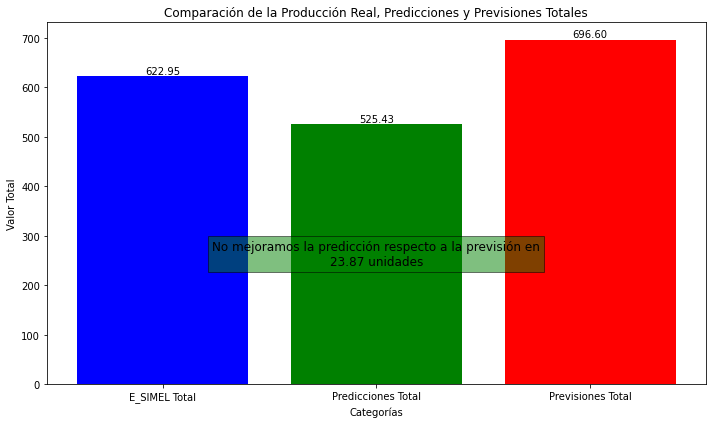

In [38]:
# Valores que cogemos para el gráfico

categorias = ['E_SIMEL Total', 'Predicciones Total', 'Previsiones Total']
valores = [suma_e_simel, sumas_totales_predicciones, sumas_previsiones]

# Creamos un gráfico de barras

plt.figure(figsize=(10, 6))
barra = plt.bar(categorias, valores, color=['blue', 'green', 'red'])

# Añadimos las etiqutas

for rect in barra:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

# Título del gráfico y ponemos las etiquteas a cada barra
    
plt.title('Comparación de la Producción Real, Predicciones y Previsiones Totales')
plt.xlabel('Categorías')
plt.ylabel('Valor Total')


# Ubicamos el texto de la diferencia

pos_y = valores[1] / 2
pos_x = categorias[1]
plt.text(pos_x, pos_y, f'No mejoramos la predicción respecto a la previsión en\n{diferencia:.2f} unidades', ha='center', va='center', fontsize=12, color='black', bbox=dict(facecolor='green', alpha=0.5))
plt.tight_layout()
plt.show()

In [36]:
suma_prevision = df_final['PREVISION'].sum()
suma_prevision

696.5999999999999

In [37]:
suma_E_SIMEL = df_final['E_SIMEL'].sum()
suma_E_SIMEL

622.953